In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os
from collections import Counter
import seaborn as sns

train = pd.read_csv('./input/ddd.csv')
train.head()

,v,w,wm,temp1,temp2,class
0,11.2,0.9,17.06,25.9,24.7,0
1,11.5,1.2,18.38,25.9,24.7,0
2,13.7,1.3,19.25,25.9,24.7,0
3,13.7,1.4,20.12,25.8,24.8,0
4,13.6,1.7,21.88,25.8,24.8,0


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88196 entries, 0 to 88195
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v       88196 non-null  float64
 1   w       88196 non-null  float64
 2   wm      88196 non-null  float64
 3   temp1   88196 non-null  float64
 4   temp2   88196 non-null  float64
 5   class   88196 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 4.0 MB


In [3]:
train.describe()

,v,w,wm,temp1,temp2,class
count,88196.000000,88196.000000,88196.000000,88196.000000,88196.000000,88196.000000
mean,12.123580,30.083964,317.247855,41.034972,30.131436,5.335956
std,2.288485,26.262692,275.079329,11.522817,4.134454,2.978624
min,0.000000,-3.200000,0.000000,24.400000,24.100000,0.000000
25%,10.800000,7.100000,75.250000,30.700000,26.800000,3.000000
50%,13.600000,22.100000,226.840000,37.900000,29.100000,6.000000
75%,13.700000,48.900000,539.440000,50.800000,32.700000,8.000000
max,14.000000,120.200000,1186.060000,67.200000,42.700000,9.000000


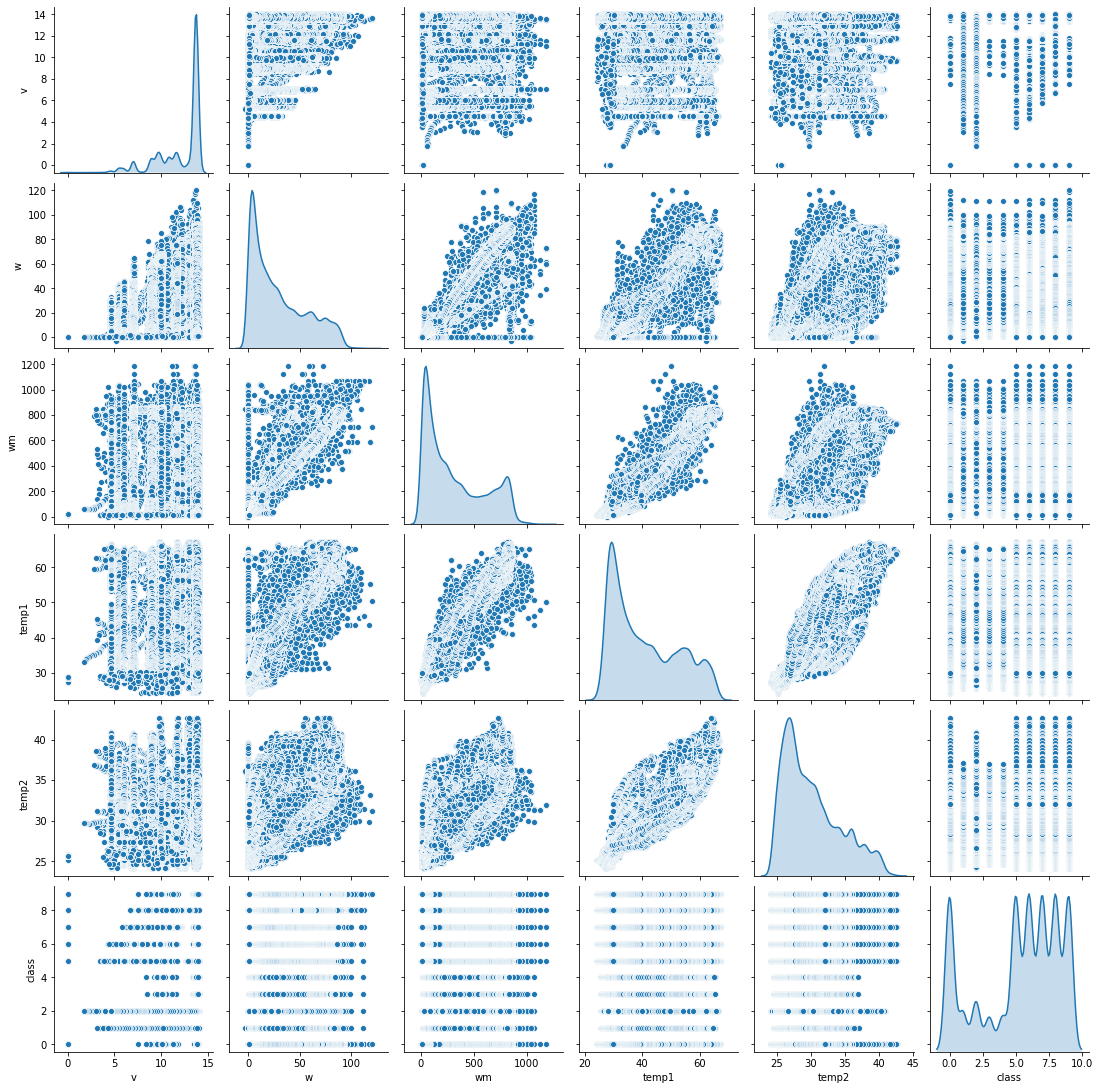

In [4]:
sns.pairplot(train[["v", "w", "wm", "temp1", "temp2", "class"]], diag_kind="kde")

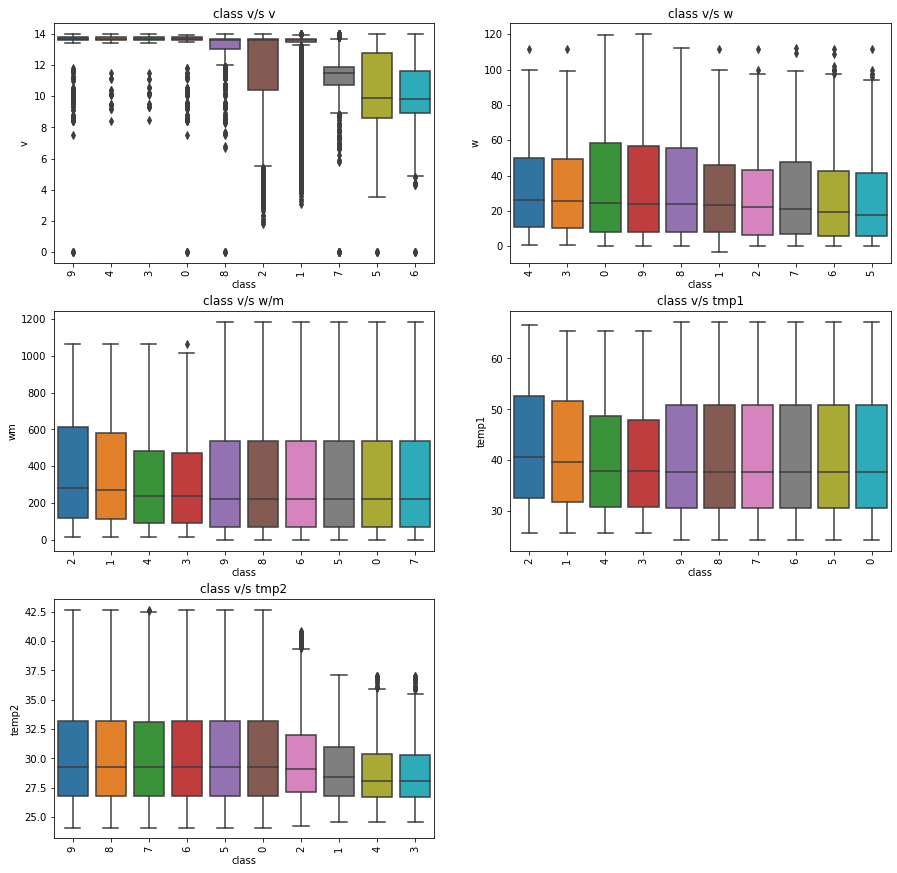

In [5]:
plt.figure(figsize= (15,15))
plt.subplot(3,2,1)
order_by = train.groupby('class')['v'].median().sort_values(ascending = False).index
sns.boxplot(x = train['class'], y = train['v'],order = order_by)
plt.xticks(rotation = 90)
plt.title('class v/s v')

plt.subplot(3,2,2)
order_by = train.groupby('class')['w'].median().sort_values(ascending = False).index
sns.boxplot(x = train['class'], y = train['w'],order = order_by)
plt.xticks(rotation = 90)
plt.title('class v/s w')

plt.subplot(3,2,3)
order_by = train.groupby('class')['wm'].median().sort_values(ascending = False).index
sns.boxplot(x = train['class'], y = train['wm'],order = order_by)
plt.xticks(rotation = 90)
plt.title('class v/s w/m')

plt.subplot(3,2,4)
order_by = train.groupby('class')['temp1'].median().sort_values(ascending = False).index
sns.boxplot(x = train['class'], y = train['temp1'],order = order_by)
plt.xticks(rotation = 90)
plt.title('class v/s tmp1')

plt.subplot(3,2,5)
order_by = train.groupby('class')['temp2'].median().sort_values(ascending = False).index
sns.boxplot(x = train['class'], y = train['temp2'],order = order_by)
plt.xticks(rotation = 90)
plt.title('class v/s tmp2')


plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in train.columns:
    train[col] = labelencoder.fit_transform(train[col])
train.head()

,v,w,wm,temp1,temp2,class
0,90,12,17,13,6,0
1,93,15,20,13,6,0
2,115,16,22,13,6,0
3,115,17,24,12,7,0
4,114,20,28,12,7,0


In [7]:
#x와 y를 분리하는 작업과 x를 정규화 시키는 작업
#y는 [class] 항목을 따로 모아두었고, x는 학습이 잘 되도록 0과 1사이의 숫자로 정규화

y = train['class'].values
x = train.drop(['class'], axis=1)
x = x.values

x = (x - x.min()) / (x.max() - x.min())

Class=0, n=12566 (14.248%)
Class=1, n=3186 (3.612%)
Class=2, n=4054 (4.597%)
Class=3, n=2755 (3.124%)
Class=4, n=2798 (3.172%)
Class=5, n=12566 (14.248%)
Class=6, n=12566 (14.248%)
Class=7, n=12573 (14.256%)
Class=8, n=12566 (14.248%)
Class=9, n=12566 (14.248%)


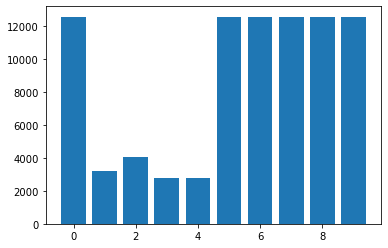

In [8]:
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()
    

count_and_plot(y)

Class=0, n=2755 (10.000%)
Class=1, n=2755 (10.000%)
Class=2, n=2755 (10.000%)
Class=3, n=2755 (10.000%)
Class=4, n=2755 (10.000%)
Class=5, n=2755 (10.000%)
Class=6, n=2755 (10.000%)
Class=7, n=2755 (10.000%)
Class=8, n=2755 (10.000%)
Class=9, n=2755 (10.000%)


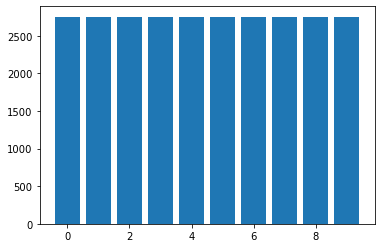

In [9]:
from imblearn.under_sampling import RandomUnderSampler
re_x, re_y = RandomUnderSampler(random_state=0).fit_resample(x, y)
count_and_plot(re_y)

In [10]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

x_train , x_test , y_train , y_test = train_test_split(re_x, re_y,test_size=0.2,shuffle = True, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=32, activation='relu', input_shape=x_train[0].shape),
     tf.keras.layers.Dense(units=16, activation='relu'),
     tf.keras.layers.Dense(units=16, activation='relu'),
     tf.keras.layers.Dense(units=10, activation='softmax') ])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 1,162
Trainable params: 1,162
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train,
                    y_train,
                    epochs=1000,
                    batch_size=200,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Train on 17632 samples, validate on 4408 samples
Epoch 1/1000
17632/17632 [==============================] - 0s 23us/sample - loss: 2.3002 - acc: 0.1226 - val_loss: 2.2947 - val_acc: 0.1441
Epoch 2/1000
17632/17632 [==============================] - 0s 10us/sample - loss: 2.2781 - acc: 0.1352 - val_loss: 2.2525 - val_acc: 0.1490
Epoch 3/1000
17632/17632 [==============================] - 0s 10us/sample - loss: 2.2133 - acc: 0.1415 - val_loss: 2.1806 - val_acc: 0.1624
Epoch 4/1000
17632/17632 [==============================] - 0s 10us/sample - loss: 2.1551 - acc: 0.1594 - val_loss: 2.1372 - val_acc: 0.1588
Epoch 5/1000
17632/17632 [==============================] - 0s 10us/sample - loss: 2.1191 - acc: 0.1676 - val_loss: 2.1081 - val_acc: 0.1788
Epoch 6/1000
17632/17632 [==============================] - 0s 10us/sample - loss: 2.0930 - acc: 0.1808 - val_loss: 2.0833 - val_acc: 0.1926
Epoch 7/1000
17632/17632 [==============================] - 0s 10us/sample - loss: 2.0697 - acc: 0.1952 -

In [14]:
#Save Model
model.save('D:/deep-learning/model/ccc.h5')
model.save_weights('D:/deep-learning/model/ccc.h5')


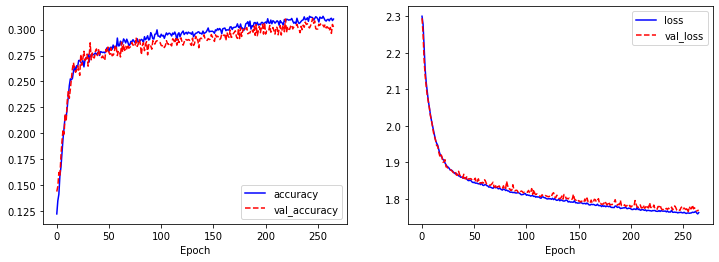

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], 'b-', label='accuracy')
plt.plot(history.history['val_acc'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

#plt.ylim(0, 1)
plt.legend()

plt.show()

In [16]:
model.evaluate(x_test, y_test)

5510/5510 [==============================] - 0s 31us/sample - loss: 1.7488 - acc: 0.3214


[1.7487712673180333, 0.3214156]

In [17]:
print(x_test[0:1])

[[0.05492331 0.40672934 0.88322613 0.18010886 0.05690252]]


In [18]:
print(y_test[0:1])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
print(model.predict(x_test[0:1]))

[[0.09391828 0.14763838 0.2005078  0.12977283 0.15539196 0.07393897
  0.02135988 0.035398   0.08186837 0.06020558]]
